<a href="https://colab.research.google.com/github/map72ru/matalg/blob/main/%D0%94%D0%972.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить 
линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.
3. [опция] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [1]:
import sklearn.datasets as ds
import numpy as nm
import matplotlib.pyplot as plt

In [49]:
class GradientDescend:

  def __init__(self):
      self.__alfa = 0.0001
      self.__iteration = 5000
      self.__err = []
      self.__epsilon = 1e-8
      self.__generate_zero = True
      self.__lambda = 0

  def set_alpha(self, new_value):
      self.__alfa = new_value

  def get_alpha(self):
      return self.__alfa

  def set_iteration(self, new_value):
      self.__iteration = new_value

  def calc_mse(self, y, y_pred):
      return nm.mean((y-y_pred)**2)

  @property
  def get_err(self):
      return self.__err

  def reset(self):
    self.__err.clear()

  def set_epsilon(self, new_value):
      self.__epsilon = new_value

  def set_lambda(self, new_value):
    self.__lambda = new_value

  def set_generate_zero_vector(self, new_value: bool):
    self.__generate_zero = new_value

  def __generate_zero_vector(self, n):
    if self.__generate_zero:
      W = nm.random.normal(size = n)
    else:
      W = [0] * n
    return W


  def gradient(self, X, y):
      n = X.shape[1]
      W = self.__generate_zero_vector(n)
      weight_dist = nm.inf
      iter_num = 0
      while weight_dist > self.__epsilon and iter_num < self.__iteration:
          y_pred = nm.dot(W, X.T)
          self.__err.append(self.calc_mse(y, y_pred))
          delta = self.__alfa * (1/n * 2 * nm.dot(X.T, (nm.dot(X, W) - y)) + self.__lambda*W)
          weight_dist = nm.linalg.norm(delta, ord=2)
          W -= delta
          iter_num += 1
      return W

  def sgd(self, X, y):
    n = X.shape[1]
    W = self.__generate_zero_vector(n)
    w_list = [W.copy()] 
    weight_dist = nm.inf
    iter_num = 0
 
    nm.random.seed(1234)
 
    while weight_dist > self.__epsilon and iter_num < self.__iteration:
    
      train_ind = nm.random.randint(X.shape[0])
      new_w = W - self.__alfa * (2/n * nm.dot(X[train_ind].T, (nm.dot(X[train_ind], W) - y[train_ind])) + self.__lambda*W)
      weight_dist = nm.linalg.norm(new_w - W, ord=2)
    
      w_list.append(new_w.copy())
      self.__err.append(self.calc_mse(X.dot(new_w), y))
    
      iter_num += 1
      W = new_w
    
    return nm.array(w_list)

In [16]:
X, y = ds.make_regression(n_samples=10000, n_features = 10, noise=0.1)

In [48]:
y.shape[0]

10000

Запустим обучение модели с начальным вектором, сформированным случайным образом по нормальному распределению

In [55]:
grad = GradientDescend()
grad.gradient(X,y)
print(max(grad.get_err), min(grad.get_err))

21362.042871756905 0.00993932159054919


In [58]:
grad2 = GradientDescend()
grad2.sgd(X, y)
print(max(grad2.get_err), min(grad2.get_err))

21361.961650246016 17563.931478730286


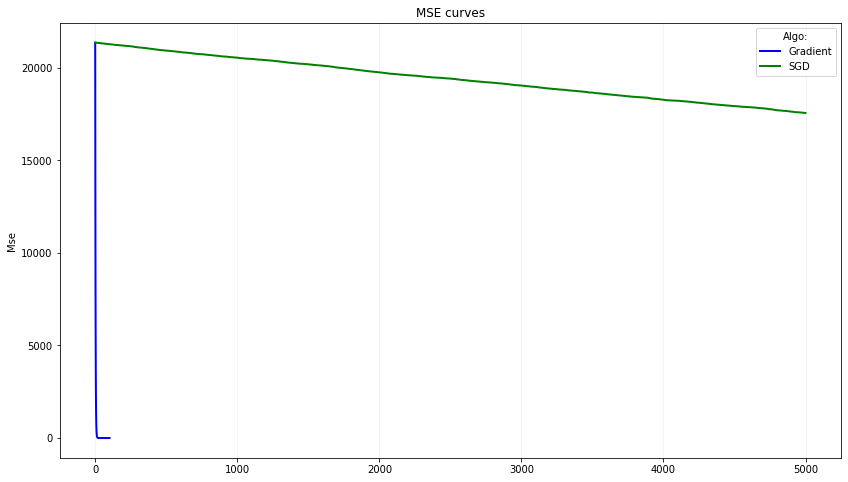

In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()

Примем в качестве начального нулевой вектор

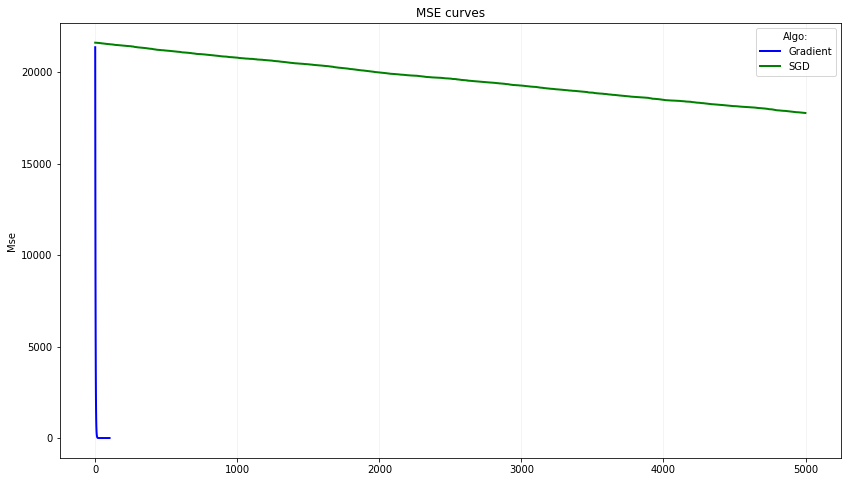

In [60]:
grad.reset()
grad2.reset()
grad.set_generate_zero_vector(True)
grad2.set_generate_zero_vector(True)

grad.gradient(X,y)
grad2.sgd(X, y)

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()

Изменим коэффициент обучения в алгоритмах (увеличим на порядок)

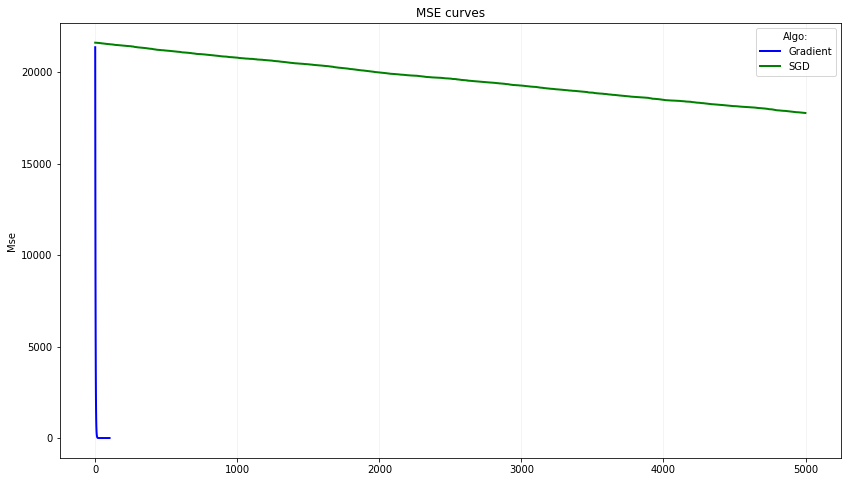

In [61]:
grad.reset()
grad2.reset()
grad2.set_alpha(0.0001)
grad.set_alpha(0.0001)

grad.gradient(X,y)
grad2.sgd(X, y)

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()

Изменим коэффициент обучения в алгоритмах (уменьшми на порядок)

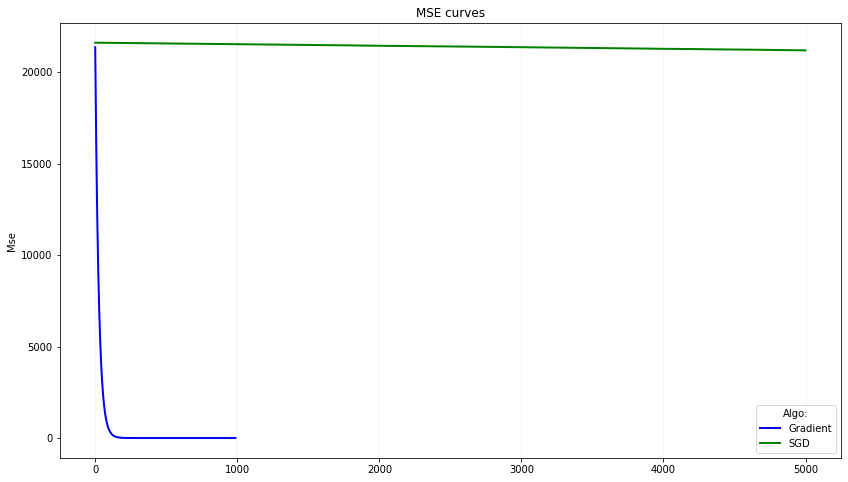

In [62]:
grad.reset()
grad2.reset()
grad2.set_alpha(0.00001)
grad.set_alpha(0.00001)

grad.gradient(X,y)
grad2.sgd(X, y)

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()

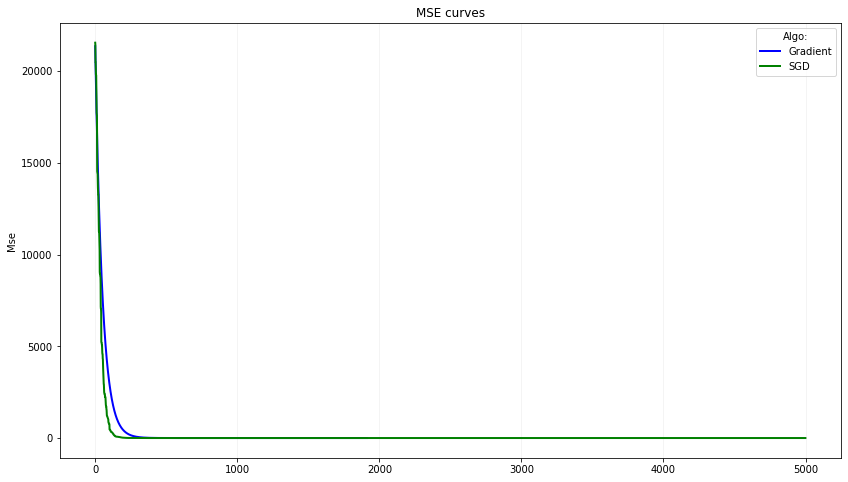

In [63]:
grad.reset()
grad2.reset()
grad2.set_alpha(0.1)
grad.set_alpha(0.000005)

grad.gradient(X,y)
grad2.sgd(X, y)

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()

Установим коэффициент L2-регуляризации

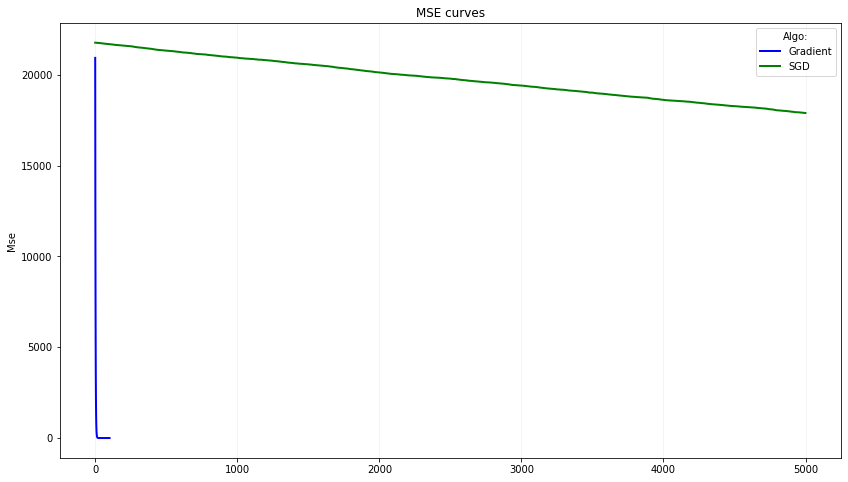

In [65]:
grad.reset()
grad2.reset()
grad2.set_alpha(0.0001)
grad.set_alpha(0.0001)
grad.set_lambda(0.0005)
grad2.set_lambda(0.0005)

grad.gradient(X,y)
grad2.sgd(X, y)

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()

Выводы:
1. Способ получения (нулевой или нормально распределенный) начального вектора никак не влияет на сходимость алгоритмов
2. Скорость сходимости в большей степени определяется правильным подбором шага обучения, нежели самим алгоритмом (для данной выборки)
3. Время работы алгоритма не анализировалось

Реализация L1 регуляризации

In [68]:
class GradientDescendL1:

  def __init__(self):
      self.__alfa = 0.0001
      self.__iteration = 5000
      self.__err = []
      self.__epsilon = 1e-8
      self.__generate_zero = True
      self.__lambda = 0

  def set_alpha(self, new_value):
      self.__alfa = new_value

  def get_alpha(self):
      return self.__alfa

  def set_iteration(self, new_value):
      self.__iteration = new_value

  def calc_mse(self, y, y_pred):
      return nm.mean((y-y_pred)**2)

  @property
  def get_err(self):
      return self.__err

  def reset(self):
    self.__err.clear()

  def set_epsilon(self, new_value):
      self.__epsilon = new_value

  def set_lambda(self, new_value):
    self.__lambda = new_value

  def set_generate_zero_vector(self, new_value: bool):
    self.__generate_zero = new_value

  def __generate_zero_vector(self, n):
    if self.__generate_zero:
      W = nm.random.normal(size = n)
    else:
      W = [0] * n
    return W


  def gradient(self, X, y):
      n = X.shape[1]
      W = self.__generate_zero_vector(n)
      weight_dist = nm.inf
      iter_num = 0
      while weight_dist > self.__epsilon and iter_num < self.__iteration:
          y_pred = nm.dot(W, X.T)
          self.__err.append(self.calc_mse(y, y_pred))
          delta = self.__alfa * (1/n * 2 * nm.dot(X.T, (nm.dot(X, W) - y)) + self.__lambda*nm.sign(W))
          weight_dist = nm.linalg.norm(delta, ord=2)
          W -= delta
          iter_num += 1
      return W

  def sgd(self, X, y):
    n = X.shape[1]
    W = self.__generate_zero_vector(n)
    w_list = [W.copy()] 
    weight_dist = nm.inf
    iter_num = 0
 
    nm.random.seed(1234)
 
    while weight_dist > self.__epsilon and iter_num < self.__iteration:
    
      train_ind = nm.random.randint(X.shape[0])
      new_w = W - self.__alfa * (2/n * nm.dot(X[train_ind].T, (nm.dot(X[train_ind], W) - y[train_ind])) + self.__lambda*nm.sign(W))
      weight_dist = nm.linalg.norm(new_w - W, ord=2)
    
      w_list.append(new_w.copy())
      self.__err.append(self.calc_mse(X.dot(new_w), y))
    
      iter_num += 1
      W = new_w
    
    return nm.array(w_list)

In [69]:
grad = GradientDescendL1()
grad.gradient(X,y)
print(max(grad.get_err), min(grad.get_err))

21610.856651725215 0.009939321590549232


In [70]:
grad = GradientDescendL1()
grad.sgd(X,y)
print(max(grad.get_err), min(grad.get_err))

21114.45464161521 17362.585085072864


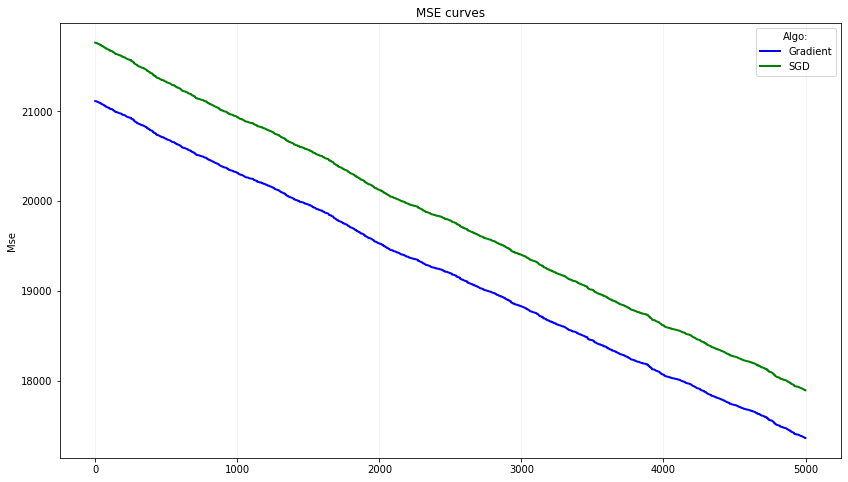

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

plt.plot(grad.get_err, color='blue', linewidth=2, label='Gradient')
plt.plot(grad2.get_err, color='green', linewidth=2, label='SGD')
plt.ylabel('Mse')
plt.legend(title='Algo:')
plt.title('MSE curves')
plt.grid(axis='x', color='0.95')


plt.show()